# Lab 5



FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/ic_vs_vce_transistor.png'

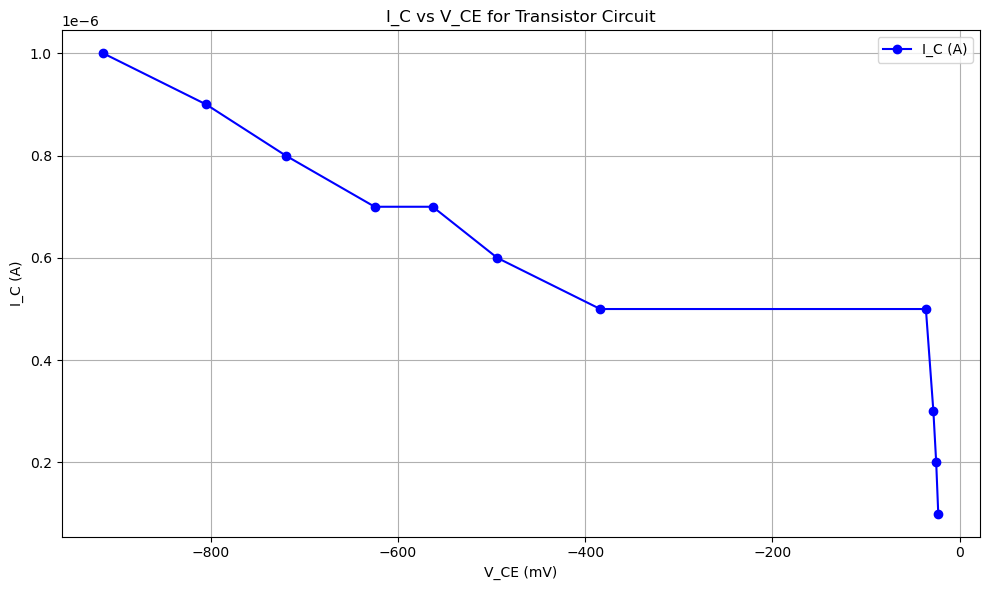

In [3]:
import matplotlib.pyplot as plt

# Data from the table
V_CC = [10.0, 9.0, 8.0, 6.8, 6.0, 5.0, 4.0, 3.5, 1.5, 1.0, 0.0]  # V_CC in Volts
I_C = [1.0, 0.9, 0.8, 0.7, 0.7, 0.6, 0.5, 0.5, 0.3, 0.2, 0.1]  # I_C in uA
V_CE = [-915, -805, -720, -625, -563, -494, -384, -36, -28, -25, -22.8]  # V_CE in mV

# Convert I_C to Amperes for the plot
I_C_A = [i * 1e-6 for i in I_C]  # from uA to A

# Create figure and plot for I_C vs V_CE
plt.figure(figsize=(10, 6))
plt.plot(V_CE, I_C_A, 'o-', label='I_C (A)', color='b')

# Adding labels and title
plt.xlabel('V_CE (mV)')
plt.ylabel('I_C (A)')
plt.title('I_C vs V_CE for Transistor Circuit')
plt.grid(True)

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.savefig('/mnt/data/ic_vs_vce_transistor.png')  # Saving the plot for download
plt.show()


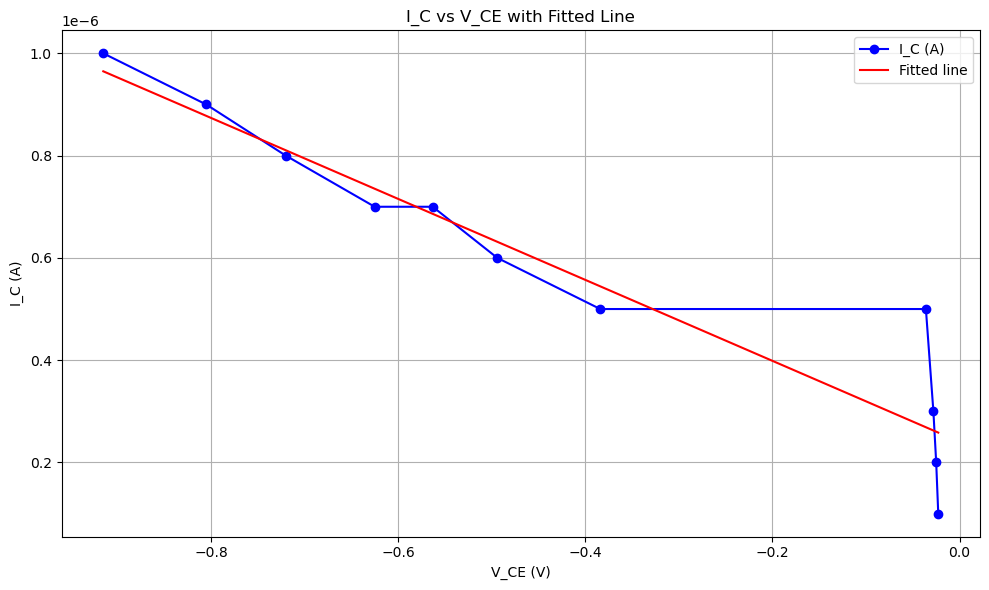

In [7]:
import numpy as np
from numpy.polynomial.polynomial import Polynomial

# Convert V_CE from mV to V for better scaling
V_CE_V = [v / 1000 for v in V_CE]  # Convert mV to V

# Fit a polynomial to the data
coefs = np.polyfit(V_CE_V, I_C_A, 1)  # Linear fit (degree 1)
p = np.poly1d(coefs)

# Generate values for the fitted line
V_CE_fit = np.linspace(min(V_CE_V), max(V_CE_V), 100)
I_C_fit = p(V_CE_fit)

# Create figure and plot for I_C vs V_CE with fitted function
plt.figure(figsize=(10, 6))

# Plot the original data
plt.plot(V_CE_V, I_C_A, 'o-', label='I_C (A)', color='b')

# Plot the fitted line
plt.plot(V_CE_fit, I_C_fit, '-', label='Fitted line', color='r')

# Adding labels and title
plt.xlabel('V_CE (V)')
plt.ylabel('I_C (A)')
plt.title('I_C vs V_CE with Fitted Line')
plt.grid(True)

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


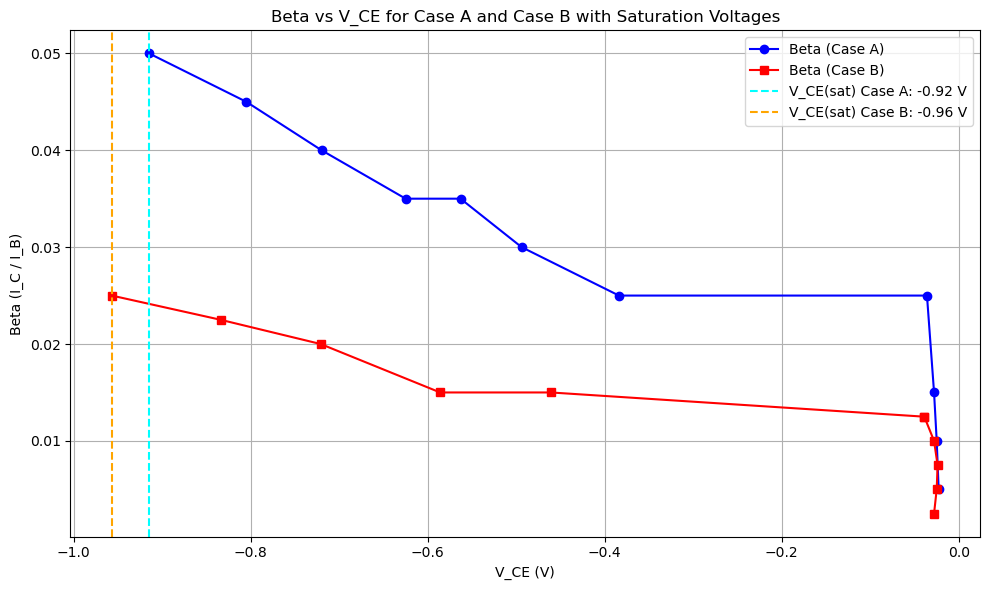

In [15]:
# Base currents for Case A and Case B
I_B_A = 20e-6  # 20 µA for Case A
I_B_B = 40e-6  # 40 µA for Case B

# Saturation Voltage V_CE(sat) estimation
V_CE_sat_A = min(V_CE_A_V)  # Approximate from the data where I_C flattens
V_CE_sat_B = min(V_CE_B_V)  # Approximate from the data where I_C flattens

# Current Gain (beta) calculation
# Beta = I_C / I_B
beta_A = np.array(I_C_A_A) / I_B_A
beta_B = np.array(I_C_B_A) / I_B_B

# Prepare to plot V_CE(sat) and Beta
V_CE_sat_values = [V_CE_sat_A, V_CE_sat_B]
cases = ['Case A', 'Case B']
beta_values_A = beta_A
beta_values_B = beta_B

# Create a plot for Beta (Case A and B) vs. V_CE with saturation voltage highlighted
plt.figure(figsize=(10, 6))

# Plot Beta for Case A
plt.plot(V_CE_A_V, beta_A, 'o-', label='Beta (Case A)', color='b')

# Plot Beta for Case B
plt.plot(V_CE_B_V, beta_B, 's-', label='Beta (Case B)', color='r')

# Mark the saturation voltages
plt.axvline(x=V_CE_sat_A, color='cyan', linestyle='--', label=f'V_CE(sat) Case A: {V_CE_sat_A:.2f} V')
plt.axvline(x=V_CE_sat_B, color='orange', linestyle='--', label=f'V_CE(sat) Case B: {V_CE_sat_B:.2f} V')

# Adding labels and title
plt.xlabel('V_CE (V)')
plt.ylabel('Beta (I_C / I_B)')
plt.title('Beta vs V_CE for Case A and Case B with Saturation Voltages')
plt.grid(True)

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()
